 Студент: Караев Сергей Моисеевич

 Группа: ЭНБО-01-22

# **Раздел 1: Постановка задачи и исходные данные:**

Компания Olist — это бразильская технологическая компания, работающая в сфере электронной коммерции. Она предоставляет платформу, которая соединяет малые и средние предприятия с крупными торговыми площадками. Olist помогает продавцам увеличить их продажи, предоставляя доступ к различным каналам распространения и упрощая процесс управления заказами.

У нас в распоряжении есть датасет с данными, которые могут позволить оценить удовлетворенность пользователей, доставку, время и количество заказов в зависимости от сезона, препдочтения в оплате.

Цель – проанализировать датасет и на основании полученных результатов сделать вывод о работа компании.

In [ ]:
#импортируем необходмые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


# **Раздел 2: Решение задачи**

In [ ]:
#выгрузим данные
reviews = pd.read_csv('/content/order_reviews_dataset.csv')
deliver = pd.read_csv('/content/orders_dataset.csv')
payments = pd.read_csv('/content/order_payments_dataset.csv')


**Описание данных:**

***Таблица order_reviews_dataset (информация об отзывах клиентах):***


review_Id — уникальный идентификатор отзыва

order_id —  уникальный идентификатор пользователя

review_score — оценка пользователя

review_comment_title — заголовок комментария

review_comment_message — комментарий пользователя

review_creation_date - дата создания комментария

review_answer_timestamp - дата ответа на комментарий

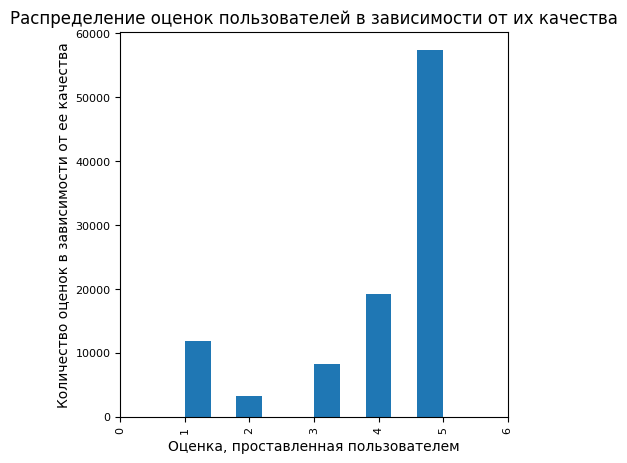

In [ ]:
from pandas.plotting import scatter_matrix
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include=[np.number])
    df = df.dropna(axis=1)
    columnNames = list(df)

    if len(columnNames) > 10:
        columnNames = columnNames[:10]

    scatter_matrix(df[columnNames], figsize=plotSize,
                   alpha=0.5, s=textSize, diagonal='hist',
                   range_padding = 0.5)

    plt.title("Распределение оценок пользователей в зависимости от их качества")
    plt.xlabel("Оценка, проставленная пользователем")
    plt.ylabel("Количество оценок в зависимости от ее качества")
    plt.show()

plotScatterMatrix(reviews, (5, 5), 10)  # Отрегулируйем размер графика и текста по мере необходимости


 ***orders_dataset - информация о доставках***

order_id - Уникальный идентификатор заказа.

customer_id - Уникальный идентификатор клиента, сделавшего заказ.

order_status - Статус заказа, например, 'delivered' (доставлено), 'invoiced' (выставлен счет) и т.д.

order_purchase_timestamp - Временная метка, указывающая, когда был сделан заказ.

order_approved_at - Временная метка, указывающая, когда заказ был подтвержден.

order_delivered_carrier_date - Временная метка, указывающая, когда заказ был передан перевозчику.

order_delivered_customer_date - Временная метка, указывающая, когда заказ был доставлен клиенту.

order_estimated_delivery_date - Оценочная дата доставки заказа.

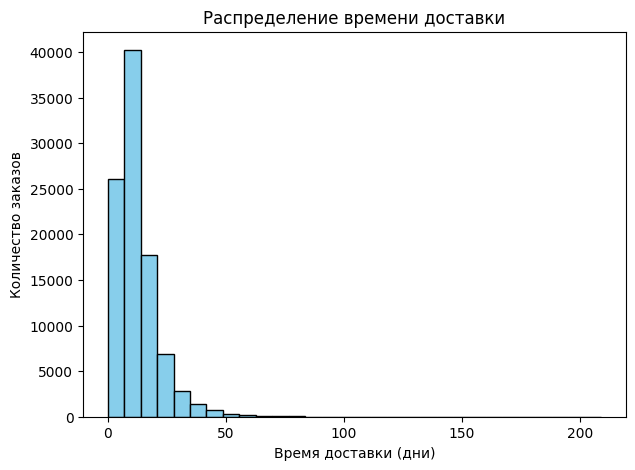

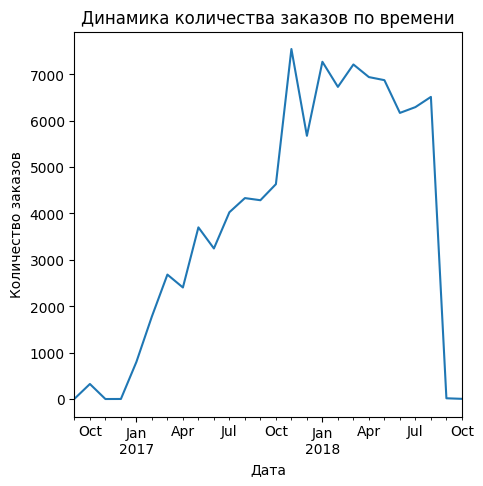

Среднее время доставки: 11 дней
Процент своевременных доставок: 89%


In [ ]:
# Преобразование строк с датами в формат datetime
deliver['order_purchase_timestamp'] = pd.to_datetime(deliver['order_purchase_timestamp'])
deliver['order_delivered_customer_date'] = pd.to_datetime(deliver['order_delivered_customer_date'])
deliver['order_approved_at'] = pd.to_datetime(deliver['order_approved_at'])
deliver['order_delivered_customer_date'] = pd.to_datetime(deliver['order_delivered_customer_date'])
deliver['order_estimated_delivery_date'] = pd.to_datetime(deliver['order_estimated_delivery_date'])

# Расчет времени доставки в днях
deliver['delivery_time'] = (deliver['order_delivered_customer_date'] - deliver['order_purchase_timestamp']).dt.days

# График распределения времени доставки
plt.figure(figsize=(7, 5))
plt.hist(deliver['delivery_time'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение времени доставки')
plt.xlabel('Время доставки (дни)')
plt.ylabel('Количество заказов')
plt.show()

# График динамики количества заказов по времени
plt.figure(figsize=(5, 5))
deliver['order_purchase_timestamp'].value_counts().resample('M').sum().plot()
plt.title('Динамика количества заказов по времени')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.show()

deliver['delivery_time'] = (deliver['order_delivered_customer_date'] - deliver['order_approved_at']).dt.days
average_delivery_time = deliver['delivery_time'].mean()

# Расчет процента своевременных доставок
deliver['on_time_delivery'] = deliver['order_delivered_customer_date'] <= deliver['order_estimated_delivery_date']
on_time_delivery_percentage = (deliver['on_time_delivery'].sum() / len(deliver)) * 100

print(f'Среднее время доставки: {int(average_delivery_time)} дней')
print(f'Процент своевременных доставок: {int(on_time_delivery_percentage)}%')


**order_payments_dataset - информация о платежных средствам**

order_id - Уникальный идентификатор заказа.

payment_sequential - Порядковый номер платежа для одного заказа.

payment_type - Способ оплаты (например, кредитная карта, болето, ваучер).

payment_installments - Количество платежей, на которое разбита сумма (рассрочка).

payment_value - Сумма платежа.

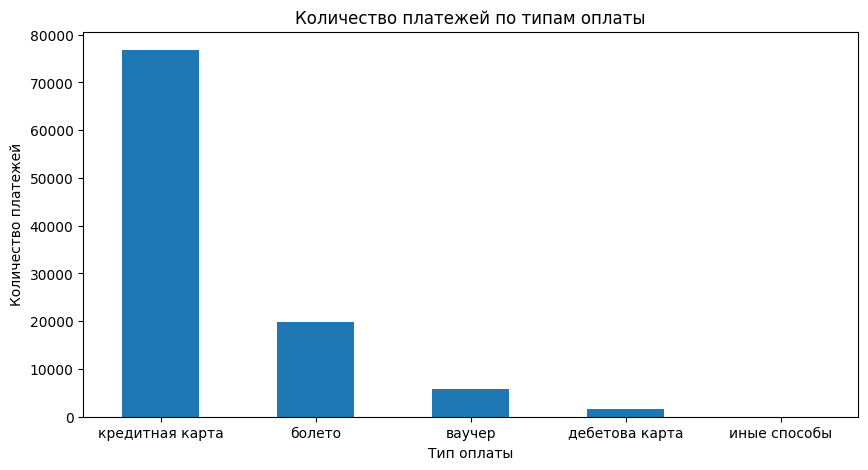

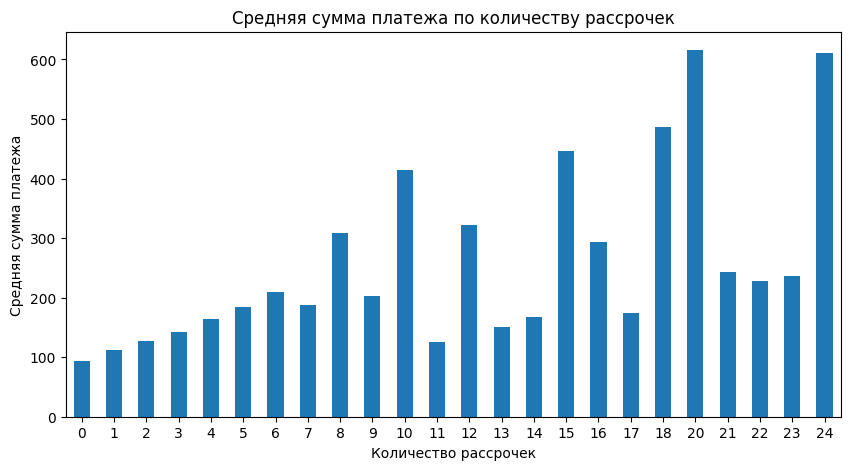

In [ ]:
# График количества платежей по типам оплаты
payment_types = payments['payment_type'].value_counts()
# Сначала создаем словарь для перевода
translation = {'credit_card': "кредитная карта", 'boleto': 'болето', 'voucher': 'ваучер',
               'debit_card': "дебетова карта", "not_defined": "иные способы"}

# Затем используем этот словарь для переименования индексов
payment_types.index = payment_types.index.map(translation)
plt.figure(figsize=(10, 5))
payment_types.plot(kind='bar')
plt.title('Количество платежей по типам оплаты')
plt.xlabel('Тип оплаты')
plt.ylabel('Количество платежей')
plt.xticks(rotation=0)
plt.show()

# График средней суммы платежа по количеству рассрочек
installments_avg = payments.groupby('payment_installments')['payment_value'].mean()
plt.figure(figsize=(10, 5))
installments_avg.plot(kind='bar')
plt.title('Средняя сумма платежа по количеству рассрочек')
plt.xlabel('Количество рассрочек')
plt.ylabel('Средняя сумма платежа')
plt.xticks(rotation=0)
plt.show()

# **Раздел 3: Выводы**

Согласно вышизложенным графикам мы можем сделать следующие выводы:
  1. Оценивая общую удовлетворенность пользователей, можем сделать вывод, что в целом этот уровен выше среднего. Существует относительно большое количесвто пользователей поставивших оценку ниже 4, необходимо провести оптимизацию поддержки пользователей, чтобы повысить вероятность сохранить доверие клиента.

  2. Среднее время доставки занимает 11 дней, при этом количество своевременных заказов 89%. Это хороший результат, учитывая общую экономическую обстановку в Бразлилии. Тем не менее, все же нельзя говорить об отсутсвии логистических проблем. Если 10% товаров не доходят до пользователей, это значит, что клиенты могут потерять доверие к компании или худшем случае, компания сама несет убытки.

  3. Оценивая динамику заказов по времени, мы можем сделать вывод, что больше всего заказов приходится на середину зимы. При этом наименьшее количество заказов приходится на осень.

  4.Оценивая способы оплаты, мы можем сделать вывод, что клиента пользуются безналичной оплатой. В основном это кредитные карты, это значит, что компании выгодно выстроить деловые отношения с банковскими партнерами.

  5. Оценивая количесвто рассрочек в зависимости от суммы, мы можем сделать вывод, что подавляющему большинству клиентов, удобнее платить не больше 300 денежных единиц.